 # Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ofek Naim 314728996
<br>
Student 2: Hinoy Solomon 205417678

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

time: 890 µs (started: 2025-01-13 09:14:37 +00:00)


## Download Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 11.1 s (started: 2025-01-13 09:14:40 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, Y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {Y.shape}')
print(f"Unique labels before filtering: {np.unique(Y)}")



Dataset shape: (5000, 784)
Labels shape: (5000,)
Unique labels before filtering: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
time: 54.3 ms (started: 2025-01-13 09:14:51 +00:00)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = Y.shape[0]
y1 = Y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 13.6 ms (started: 2025-01-13 09:14:51 +00:00)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)


filter = (Y == "2") | (Y == "7")

X, Y = X[filter], Y[filter]

Y = (Y == "7").astype(int)

print(X.shape)
print(Y.shape)
print(f"Unique labels in filtered dataset: {np.unique(Y)}")





(1000, 784)
(1000,)
Unique labels in filtered dataset: [0 1]
time: 3.89 ms (started: 2025-01-13 09:14:51 +00:00)


### Split the data into Train set and Test set

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

split_ratio = 0.8

# Use shuffle on the train data
X, y = shuffle(X, Y)

split_index = int(split_ratio * X.shape[0])


X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = y[:split_index], y[split_index:]


Y_train, Y_test = Y_train.reshape( Y_train.shape[0], 1), Y_test.reshape(Y_test.shape[0],1)


time: 4.43 ms (started: 2025-01-13 09:14:51 +00:00)


In [ ]:
#Normalize the data

X_train = X_train.T/255
X_test = X_test.T/255

time: 2.81 ms (started: 2025-01-13 09:14:51 +00:00)


### Test yourself

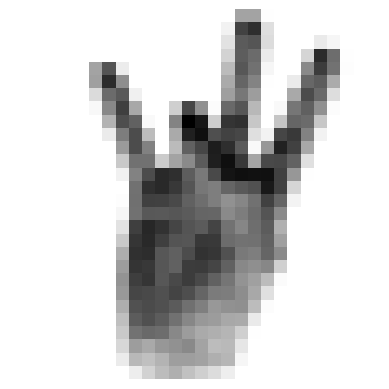

1

time: 61.9 ms (started: 2025-01-13 09:14:51 +00:00)


In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

time: 680 µs (started: 2025-01-13 09:14:53 +00:00)


## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)


    y_hat = np.asarray(y_hat, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)


    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

time: 881 µs (started: 2025-01-13 09:14:54 +00:00)


## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 128
learning_rate = 0.01
epochs = 100

time: 648 µs (started: 2025-01-13 09:14:56 +00:00)


## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(128, 784)
(128, 1)
(1, 128)
(1, 1)
time: 14.2 ms (started: 2025-01-13 09:14:57 +00:00)


## Training (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X_train.shape[1]

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(num_of_examples):
    # TODO :  Forward propagation

    Z1 = np.matmul(W1,X[:,j])+b1.flatten() # DO NOT FORGET TO ADD THE BIAS
    A1 =sigmoid(Z1)
    Z2 = np.matmul(W2,A1)+b2.flatten()
    A2 =sigmoid(Z2)
    Yout = float(Y[j])

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    dZ2 = (A2-Yout)
    dW2 =np.outer(dZ2, A1)
    db2 = dZ2

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1) # Sigmoid derivative
    dW1 = np.outer(dZ1, X[:, j].reshape(1,-1)) # reshape X[:,j]
    db1 =  dZ1.reshape(-1, 1)

    # TODO: Update weights
    W2-= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

<ipython-input-58-df5ed6c7e0c0>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Yout = float(Y[j])


Epoch 0  Loss: 0.6466635591679271
Epoch 1  Loss: 0.1939736927250777
Epoch 2  Loss: 0.1278573993936232
Epoch 3  Loss: 0.09651715623427695
Epoch 4  Loss: 0.07692203760842958
Epoch 5  Loss: 0.06329022784145405
Epoch 6  Loss: 0.053295802272002396
Epoch 7  Loss: 0.04571618774835717
Epoch 8  Loss: 0.03981234099534989
Epoch 9  Loss: 0.03511105004990146
Epoch 10  Loss: 0.03129804182150761
Epoch 11  Loss: 0.028157582836681745
Epoch 12  Loss: 0.025536907792842185
Epoch 13  Loss: 0.023324863595444376
Epoch 14  Loss: 0.021438704690097538
Epoch 15  Loss: 0.0198156400522996
Epoch 16  Loss: 0.01840725625717773
Epoch 17  Loss: 0.017175734223193125
Epoch 18  Loss: 0.016091207846015934
Epoch 19  Loss: 0.015129868194456211
Epoch 20  Loss: 0.014272571403434915
Epoch 21  Loss: 0.01350379922841037
Epoch 22  Loss: 0.0128108738011512
Epoch 23  Loss: 0.012183359291100159
Epoch 24  Loss: 0.011612602717148878
Epoch 25  Loss: 0.011091379199381222
Epoch 26  Loss: 0.010613616078473984
Epoch 27  Loss: 0.010174176919

### Loss Visualization

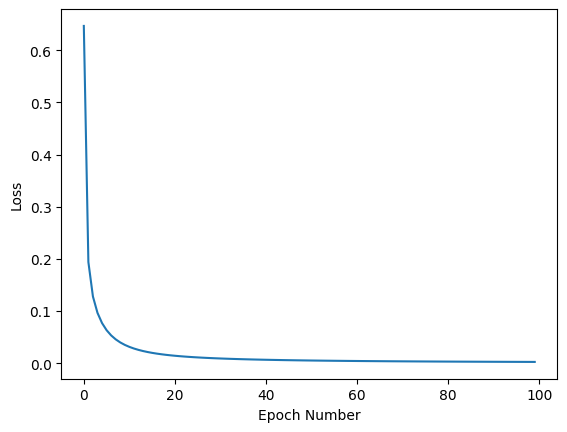

time: 208 ms (started: 2025-01-13 09:16:12 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))

[[100   0]
 [  0 100]]
time: 13.6 ms (started: 2025-01-13 09:16:16 +00:00)


### Visualize the results

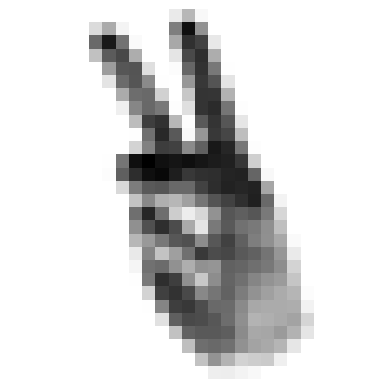

Real= 0 Predicted= [0.00012356]


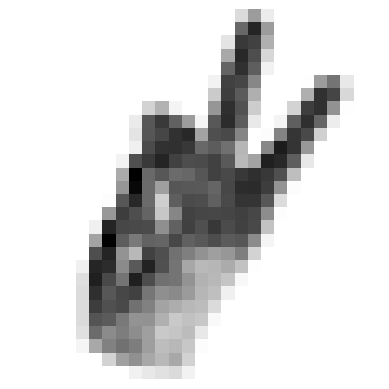

Real= 0 Predicted= [0.02227679]


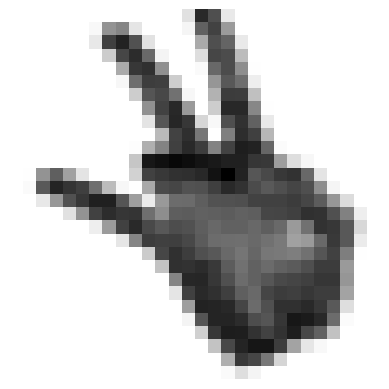

Real= 1 Predicted= [0.99832028]


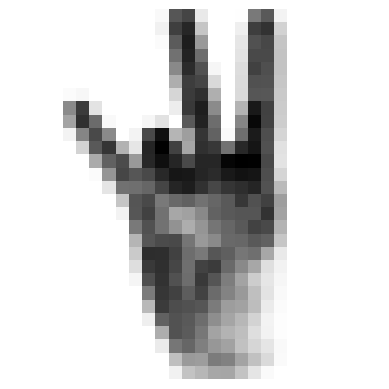

Real= 1 Predicted= [0.97456987]


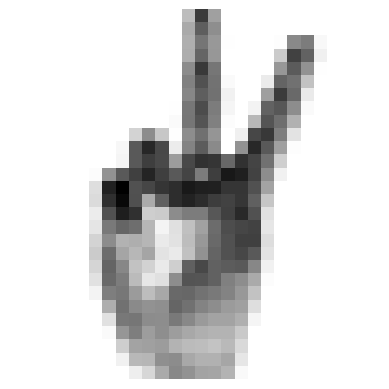

Real= 0 Predicted= [0.00268352]


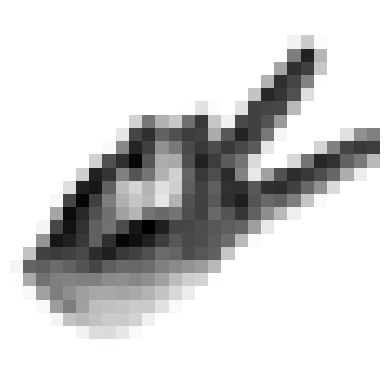

Real= 0 Predicted= [0.30936352]


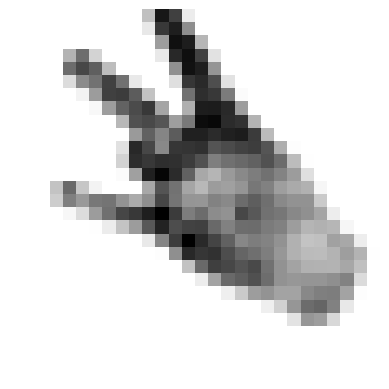

Real= 1 Predicted= [0.99999521]


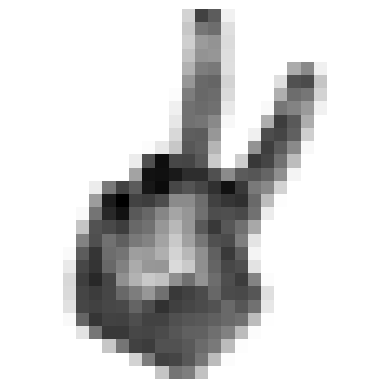

Real= 0 Predicted= [0.00620852]


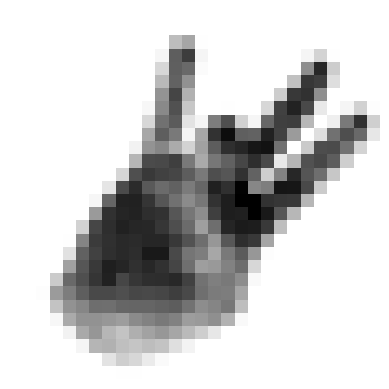

Real= 1 Predicted= [0.99998129]


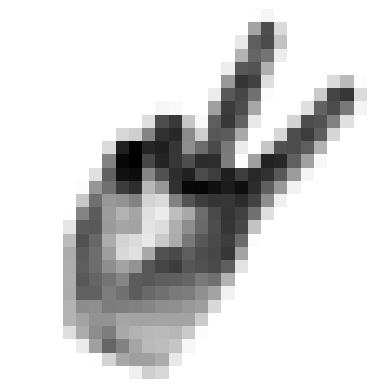

Real= 0 Predicted= [0.00136285]
time: 709 ms (started: 2025-01-13 09:16:29 +00:00)


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  # TODO :  Forward propagation
  Z1 = np.matmul(W1, X_test[:, i]) + b1.flatten()
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2.flatten()
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2)